In [ ]:
pip install librosa

In [ ]:
#installing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
import statsmodels.api as sm
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from imblearn import over_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss,accuracy_score,confusion_matrix,mean_squared_log_error
import cv2
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')
import os
import tensorflow as tf
import librosa
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#directories to get data
DC='/content/drive/My Drive/AudioData/AudioData/DC'
JE='/content/drive/My Drive/AudioData/AudioData/JE'
JK='/content/drive/My Drive/AudioData/AudioData/JK'
KL='/content/drive/My Drive/AudioData/AudioData/KL'
print(os.listdir(DC))

['a15.wav', 'a14.wav', 'a05.wav', 'a04.wav', 'a03.wav', 'a02.wav', 'a01.wav', 'a06.wav', 'a07.wav', 'a08.wav', 'a09.wav', 'a10.wav', 'a13.wav', 'a12.wav', 'a11.wav', 'd01.wav', 'd02.wav', 'd03.wav', 'd04.wav', 'd05.wav', 'd10.wav', 'd09.wav', 'd08.wav', 'd07.wav', 'd06.wav', 'd15.wav', 'd14.wav', 'd13.wav', 'd12.wav', 'd11.wav', 'f01.wav', 'f02.wav', 'f03.wav', 'f04.wav', 'f05.wav', 'f10.wav', 'f09.wav', 'f08.wav', 'f07.wav', 'f06.wav', 'f15.wav', 'f14.wav', 'f13.wav', 'f12.wav', 'f11.wav', 'h01.wav', 'h02.wav', 'h03.wav', 'h04.wav', 'h05.wav', 'h10.wav', 'h09.wav', 'h08.wav', 'h07.wav', 'h06.wav', 'h11.wav', 'h12.wav', 'h13.wav', 'h14.wav', 'h15.wav', 'n05.wav', 'n04.wav', 'n03.wav', 'n02.wav', 'n01.wav', 'n06.wav', 'n07.wav', 'n08.wav', 'n09.wav', 'n10.wav', 'n11.wav', 'n12.wav', 'n13.wav', 'n14.wav', 'n15.wav', 'n20.wav', 'n19.wav', 'n18.wav', 'n17.wav', 'n16.wav', 'n21.wav', 'n22.wav', 'n23.wav', 'n24.wav', 'n25.wav', 'n26.wav', 'n27.wav', 'n28.wav', 'n29.wav', 'n30.wav', 'sa01.wav

In [ ]:
#extracting labels
labels=[]
a=os.listdir(DC)
for i in range(len(a)):
    x=[j for j in a[i]]
    if x[0]=='s':
        labels.append(x[0]+x[1])
    else:
        labels.append(x[0])

a=os.listdir(JE)
for i in range(len(a)):
    x=[j for j in a[i]]
    if x[0]=='s':
        labels.append(x[0]+x[1])
    else:
        labels.append(x[0])

a=os.listdir(JK)
for i in range(len(a)):
    x=[j for j in a[i]]
    if x[0]=='s':
        labels.append(x[0]+x[1])
    else:
        labels.append(x[0])

a=os.listdir(KL)
for i in range(len(a)):
    x=[j for j in a[i]]
    if x[0]=='s':
        labels.append(x[0]+x[1])
    else:
        labels.append(x[0])  

In [ ]:
import numpy as np
labels=np.array(labels)
print(labels.shape)

(480,)


In [ ]:
#appending required features
import librosa
import pandas as pd
current_dir=DC
audio_files=os.listdir(current_dir)
zcr1,mfcc1,delta1,delta12=[],[],[],[]
for i in audio_files:
    audio_path=os.path.join(current_dir,i)
    x,sr=librosa.load(audio_path)    
    zcr = librosa.feature.zero_crossing_rate(x)
    zcr1.append(np.mean(zcr))    
    mfcc = librosa.feature.mfcc(x, sr=sr)
    a=[]
    for j in range(mfcc.shape[0]):
        a.append(np.mean(mfcc[j,:]))
    mfcc1.append(a)                        
    delta= librosa.feature.delta(mfcc)
    b=[]
    for j in range(delta.shape[0]):
        b.append(np.mean(delta[j,:]))
    delta1.append(a)
    c=[]
    delta2= librosa.feature.delta(mfcc,order=2)
    for j in range(delta2.shape[0]):
        c.append(np.mean(delta2[j,:]))
    delta12.append(c)      

In [ ]:
print(len(zcr1),len(mfcc1),len(delta1),len(delta12))

120 120 120 120


In [ ]:
current_dir=JE
audio_files=os.listdir(current_dir)
for i in audio_files:
    audio_path=os.path.join(current_dir,i)
    x,sr=librosa.load(audio_path)   
    zcr = librosa.feature.zero_crossing_rate(x)
    zcr1.append(np.mean(zcr))    
    mfcc = librosa.feature.mfcc(x, sr=sr)
    a=[]
    for j in range(mfcc.shape[0]):
        a.append(np.mean(mfcc[j,:]))
    mfcc1.append(a)
    delta= librosa.feature.delta(mfcc)
    b=[]
    for j in range(delta.shape[0]):
        b.append(np.mean(delta[j,:]))
    delta1.append(a)
    c=[]
    delta2= librosa.feature.delta(mfcc,order=2)
    for j in range(delta2.shape[0]):
        c.append(np.mean(delta2[j,:]))
    delta12.append(c)               
                
    

In [ ]:
print(len(zcr1),len(mfcc1),len(delta1),len(delta12))

240 240 240 240


In [ ]:
current_dir=JK
audio_files=os.listdir(current_dir)
for i in audio_files:
    audio_path=os.path.join(current_dir,i)
    x,sr=librosa.load(audio_path)   
    zcr = librosa.feature.zero_crossing_rate(x)
    zcr1.append(np.mean(zcr))    
    mfcc = librosa.feature.mfcc(x, sr=sr)
    a=[]
    for j in range(mfcc.shape[0]):
        a.append(np.mean(mfcc[j,:]))
    mfcc1.append(a)  
    delta= librosa.feature.delta(mfcc)
    b=[]
    for j in range(delta.shape[0]):
        b.append(np.mean(delta[j,:]))
    delta1.append(a)
    c=[]
    delta2= librosa.feature.delta(mfcc,order=2)
    for j in range(delta2.shape[0]):
        c.append(np.mean(delta2[j,:]))
    delta12.append(c)                
                
    

In [ ]:
current_dir=KL
audio_files=os.listdir(current_dir)
for i in audio_files:
    audio_path=os.path.join(current_dir,i)
    x,sr=librosa.load(audio_path)   
    zcr = librosa.feature.zero_crossing_rate(x)
    zcr1.append(np.mean(zcr))    
    mfcc = librosa.feature.mfcc(x, sr=sr)
    a=[]
    for j in range(mfcc.shape[0]):
        a.append(np.mean(mfcc[j,:]))
    mfcc1.append(a)              
    delta= librosa.feature.delta(mfcc)
    b=[]
    for j in range(delta.shape[0]):
        b.append(np.mean(delta[j,:]))
    delta1.append(a)
    c=[]
    delta2= librosa.feature.delta(mfcc,order=2)
    for j in range(delta2.shape[0]):
        c.append(np.mean(delta2[j,:]))
    delta12.append(c)                 
    

In [ ]:
print(len(zcr1),len(mfcc1),len(delta1),len(delta12))

480 480 480 480


In [ ]:
#creating arrays fro concatenation
delta1=np.array(delta1)
delta12=np.array(delta12)
zcr1=np.array(zcr1)
mfcc1=np.array(mfcc1)
print(mfcc1.shape,zcr1.shape,delta1.shape,delta12.shape)

(480, 20) (480,) (480, 20) (480, 20)


In [ ]:
zcr1=zcr1.reshape(-1,1)

In [ ]:
#concatenating all the featur arrays
final1=np.append(mfcc1,zcr1,axis=1)
final1=np.append(final1,delta1,axis=1)
final1=np.append(final1,delta12,axis=1)
print(final1.shape)

(480, 61)


In [ ]:
final=final1.copy()
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
final=std.fit_transform(final)

In [ ]:
#final=final.reshape(480,25,1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labels=labels.reshape(-1,1)
labels=le.fit_transform(labels)
#labels_onehot=tf.keras.utils.to_categorical(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(final,labels,stratify=labels,test_size=0.2,random_state=100)

In [ ]:
x_train_dl=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test_dl=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

y_train_dl=tf.keras.utils.to_categorical(y_train)
y_test_dl=tf.keras.utils.to_categorical(y_test)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(122,activation='relu',input_shape=(61,1)))
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(final.shape[1],)))
model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(7, activation='softmax'))
model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train_dl,
                    y_train_dl,
                    epochs=500,
                    batch_size=3,validation_split=0.2)

Epoch 1/500
103/103 [==============================] - 4s 38ms/step - loss: 1.9402 - acc: 0.2410 - val_loss: 1.9138 - val_acc: 0.2468
Epoch 2/500
103/103 [==============================] - 4s 36ms/step - loss: 196.5522 - acc: 0.2508 - val_loss: 1.9095 - val_acc: 0.2468
Epoch 3/500
103/103 [==============================] - 4s 38ms/step - loss: 1.9223 - acc: 0.2508 - val_loss: 1.9137 - val_acc: 0.2468
Epoch 4/500
103/103 [==============================] - 4s 39ms/step - loss: 1.9331 - acc: 0.2508 - val_loss: 1.9117 - val_acc: 0.2468
Epoch 5/500
103/103 [==============================] - 4s 38ms/step - loss: 658.1641 - acc: 0.2508 - val_loss: 1.8942 - val_acc: 0.2468
Epoch 6/500
103/103 [==============================] - 4s 40ms/step - loss: 1.8792 - acc: 0.2508 - val_loss: 1.8984 - val_acc: 0.2468
Epoch 7/500
103/103 [==============================] - 4s 38ms/step - loss: 1.8759 - acc: 0.2508 - val_loss: 1.8736 - val_acc: 0.2857
Epoch 8/500
103/103 [==============================] - 4s 

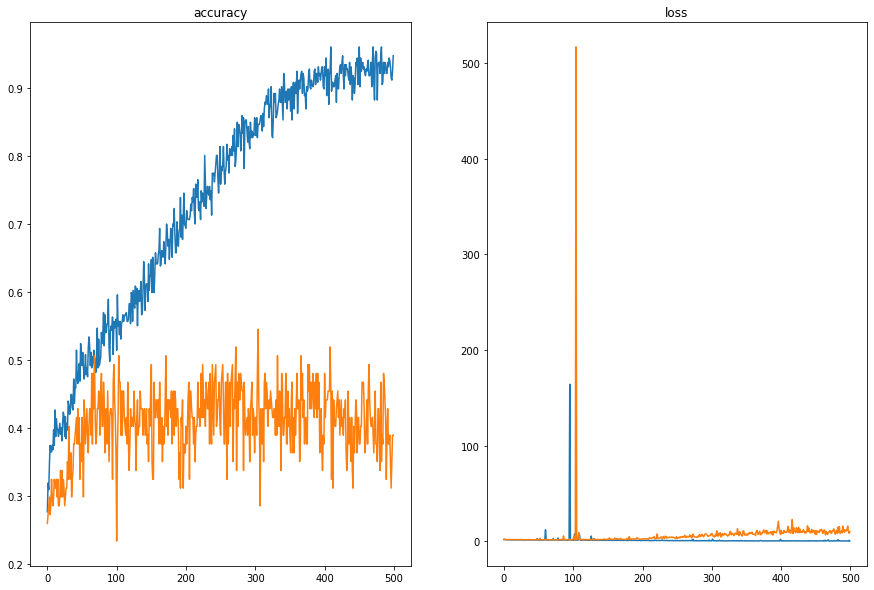

In [ ]:
import matplotlib.pyplot as plt
acc=history.history['acc']
loss=history.history['loss']
val_acc=history.history['val_acc']
val_loss=history.history['val_loss']
plt.rcParams['figure.figsize']=15,10
plt.subplot(1,2,1)
plt.plot(range(500),acc)
plt.plot(range(500),val_acc)
plt.title('accuracy')
plt.subplot(1,2,2)
plt.plot(range(500),loss)
plt.plot(range(500),val_loss)
plt.title('loss')
plt.show()

In [ ]:
print(model.evaluate(x_test_dl,y_test_dl))p

3/3 [==============================] - 0s 3ms/step - loss: 50.0146 - acc: 0.0625
[50.01457977294922, 0.0625]


In [ ]:
xgb=XGBClassifier(max_depth=3,n_estimators=1000,min_child_weight=3,gamma=1,reg_lambda=2,colsample_bytree=0.8,seed=42)
xgb.fit(x_train,y_train)
predict=xgb.predict(x_test)
print(accuracy_score(y_test,predict))

0.6145833333333334


In [ ]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5,random_state=10,shuffle=True)
for train_index,test_index in skf.split(x_train,y_train):
  x_train_skf,x_test_skf=x_train[train_index],x_train[test_index]
  y_train_skf,y_test_skf=y_train[train_index],y_train[test_index]
  xgb.fit(x_train_skf,y_train_skf)
  predict=xgb.predict(x_test_skf)
  print(accuracy_score(y_test_skf,predict))

0.5584415584415584
0.5584415584415584
0.5584415584415584
0.5324675324675324
0.4605263157894737


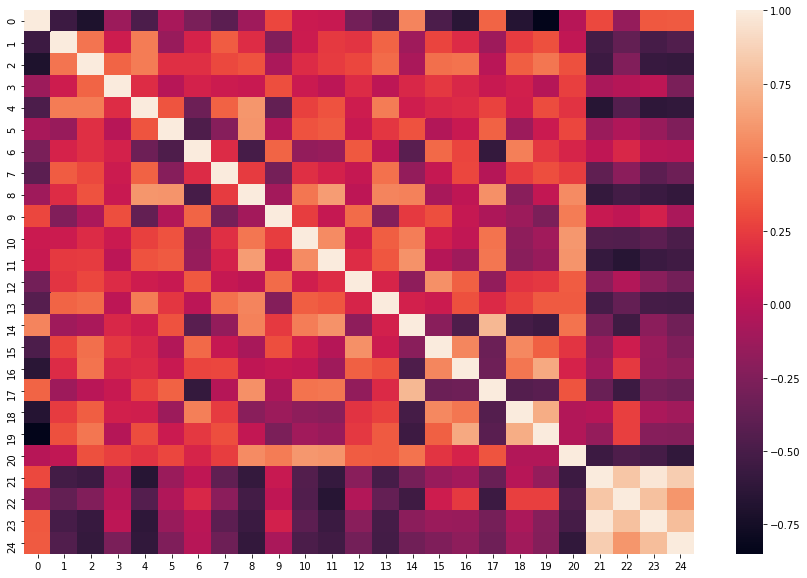

In [ ]:
x=pd.DataFrame(final)
sns.heatmap(x.corr())
plt.show()